In [2]:
import torch
import numpy as np

In [2]:
ndarray=np.array([0,1,2])

In [3]:
t=torch.from_numpy(ndarray)
print(t)

tensor([0, 1, 2], dtype=torch.int32)


In [6]:
print(t.shape)
print(t.dtype)
print(t.device)

torch.Size([3])
torch.int32
cpu


In [8]:
t=torch.tensor([0,1,2])
print(t)

tensor([0, 1, 2])


In [9]:
ndarray=np.array([[0,1,2],[3,4,5]])
t=torch.from_numpy(ndarray)
print(t)

tensor([[0, 1, 2],
        [3, 4, 5]], dtype=torch.int32)


In [11]:
new_t=torch.rand_like(t,dtype=torch.float)
print(new_t)

tensor([[0.7890, 0.0697, 0.3998],
        [0.5874, 0.0136, 0.8083]])


In [12]:
my_shape=(3,3)
rand_t=torch.rand(my_shape)
print(rand_t)

tensor([[0.3192, 0.6745, 0.1592],
        [0.5602, 0.3512, 0.3928],
        [0.7727, 0.0248, 0.2559]])


In [21]:
zero_tensor=torch.zeros((2,3))
print(zero_tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [14]:
zero_tensor[:1,:]

tensor([[0., 0., 0.]])

In [19]:
zero_tensor[:,0]

tensor([0., 0.])

In [22]:
rand_tensor=torch.randint_like(zero_tensor,low=2,high=8)
print(rand_tensor)

tensor([[2., 5., 2.],
        [3., 4., 7.]])


In [25]:
rand_tensor[:,1:]

tensor([[5., 2.],
        [4., 7.]])

In [26]:
transposed=rand_tensor.T
print(transposed)

tensor([[2., 3.],
        [5., 4.],
        [2., 7.]])


In [31]:
another_rand_tensor=torch.randint_like(torch.ones(my_shape),low=1,high=5)
print(another_rand_tensor)

tensor([[2., 2., 1.],
        [3., 4., 3.],
        [1., 4., 1.]])


In [32]:
product=torch.matmul(rand_tensor,another_rand_tensor)
print(product)

tensor([[21., 32., 19.],
        [25., 50., 22.]])


In [35]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [36]:
training_data=datasets.MNIST(root=".",train=True,download=True,transform=ToTensor())
test_data=datasets.MNIST(root=".",train=False,download=True,transform=ToTensor())

100.0%


Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw



100.0%


Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw



100.0%


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw



100.0%

Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



In [37]:
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

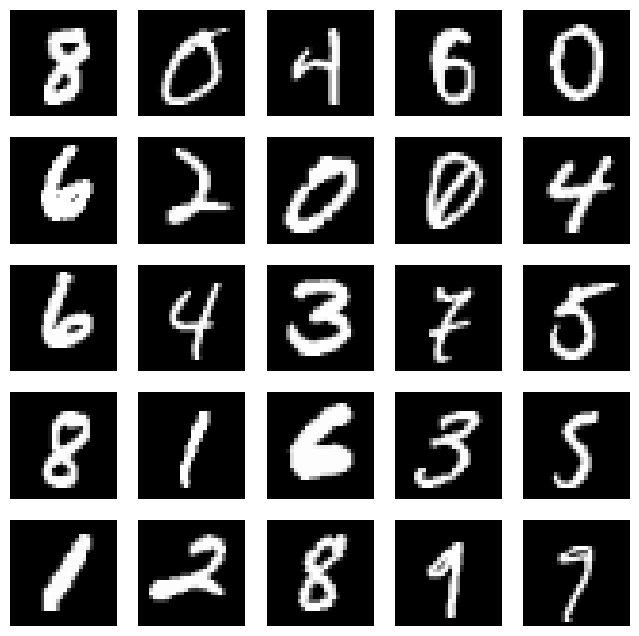

In [38]:
figure=plt.figure(figsize=(8,8))
cols,rows=5,5

for i in range(1,cols*rows+1):
    sample_idx=torch.randint(len(training_data),size=(1,)).item()
    img,label=training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.axis("off")
    plt.imshow(img.squeeze(),cmap="gray")

plt.show()

In [41]:
training_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [42]:
from torch.utils.data import DataLoader

loaded_train=DataLoader(training_data,batch_size=64,shuffle=True)
loaded_test=DataLoader(test_data,batch_size=64,shuffle=True)

In [56]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.Flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
                    )
        

    def forward(self,x):
        x=self.Flatten(x)
        logits=self.linear_relu_stack(x)
        return logits

In [58]:
model=NeuralNetwork()
print(model)

NeuralNetwork(
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [45]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)

In [52]:
def train(dataloader,model,loss_fn,optimzer):
    size=len(dataloader.dataset)
    for batch,(X,y) in enumerate(dataloader):
        pred=model(X)
        loss=loss_fn(pred,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch%1000==0:
            loss,current=loss.item(),batch*len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [53]:
def test(dataloader,model,loss_fn):
    size=len(dataloader.dataset)
    num_batches=len(dataloader)
    test_loss,correct=0,0

    with torch.no_grad():
        for X,y in dataloader:
            pred=model(X)
            test_loss+=loss_fn(pred,y).item()
            correct+=(pred.argmax(1)==y).type(torch.float).sum().item()

    test_loss/=num_batches
    correct/=size
    print(f"Test Error: \n Accuracy : {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")

In [60]:
epochs=10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------------------")
    train(loaded_train,model,loss_function,optimizer)
    test(loaded_test,model,loss_function)

print("Done!")

Epoch 1
-------------------------------------------
loss: 2.309377 [    0/60000]
Test Error: 
 Accuracy : 8.6%, Avg loss: 2.309096

Epoch 2
-------------------------------------------
loss: 2.309136 [    0/60000]
Test Error: 
 Accuracy : 8.6%, Avg loss: 2.308993

Epoch 3
-------------------------------------------
loss: 2.307064 [    0/60000]
Test Error: 
 Accuracy : 8.6%, Avg loss: 2.309054

Epoch 4
-------------------------------------------
loss: 2.312648 [    0/60000]
Test Error: 
 Accuracy : 8.6%, Avg loss: 2.308975

Epoch 5
-------------------------------------------
loss: 2.314936 [    0/60000]
Test Error: 
 Accuracy : 8.6%, Avg loss: 2.308982

Epoch 6
-------------------------------------------
loss: 2.312207 [    0/60000]
Test Error: 
 Accuracy : 8.6%, Avg loss: 2.309073

Epoch 7
-------------------------------------------
loss: 2.303065 [    0/60000]
Test Error: 
 Accuracy : 8.6%, Avg loss: 2.309033

Epoch 8
-------------------------------------------
loss: 2.301699 [    0/60

In [3]:
#check if gpu is available
gpu_avail=torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? False


In [4]:
print(torch.__version__)

2.0.1


In [5]:
torch.manual_seed(42)

In [6]:
x=torch.Tensor(2,3,4)
print(x)

tensor([[[5.3930e+06, 6.5441e-43, 5.3930e+06, 6.5441e-43],
         [5.3990e+06, 6.5441e-43, 5.3990e+06, 6.5441e-43],
         [5.3950e+06, 6.5441e-43, 5.3950e+06, 6.5441e-43]],

        [[5.4868e+06, 6.5441e-43, 5.4868e+06, 6.5441e-43],
         [5.4871e+06, 6.5441e-43, 5.4870e+06, 6.5441e-43],
         [5.4823e+06, 6.5441e-43, 5.4822e+06, 6.5441e-43]]])


In [7]:
#create a tensor from a (nested) list
x=torch.Tensor([[1,2],[3,4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [8]:
x1=torch.rand(2,3)
x2=torch.rand(2,3)
y=x1+x2

print("X1",x1)
print("X2",x2)
print("Y",y)

X1 tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])
X2 tensor([[0.2566, 0.7936, 0.9408],
        [0.1332, 0.9346, 0.5936]])
Y tensor([[1.1388, 1.7086, 1.3236],
        [1.0925, 1.3250, 1.1945]])


In [9]:
x1=torch.rand(2,3)
x2=torch.rand(2,3)
print("X1 (before)",x1)
print("X2 (before)",x2)

x2.add_(x1)
print("X1 (after)",x1)
print("X2 (after)",x2)

X1 (before) tensor([[0.8694, 0.5677, 0.7411],
        [0.4294, 0.8854, 0.5739]])
X2 (before) tensor([[0.2666, 0.6274, 0.2696],
        [0.4414, 0.2969, 0.8317]])
X1 (after) tensor([[0.8694, 0.5677, 0.7411],
        [0.4294, 0.8854, 0.5739]])
X2 (after) tensor([[1.1360, 1.1952, 1.0107],
        [0.8708, 1.1824, 1.4056]])


In [10]:
x=torch.arange(6)
print("X",x)

X tensor([0, 1, 2, 3, 4, 5])


In [11]:
x=x.view(2,3)
print(x)

tensor([[0, 1, 2],
        [3, 4, 5]])


In [12]:
x=x.permute(1,0)
print("X",x)

X tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [13]:
x=torch.arange(6)
x=x.view(2,3)
print("X",x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [14]:
W=torch.arange(9).view(3,3)
print("W",W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [15]:
h=torch.matmul(x,W)
print("h",h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


In [16]:
x=torch.ones((3,))
print(x.requires_grad)

False


In [17]:
x.requires_grad_(True)
print(x.requires_grad)

True


In [18]:
#Sample gradient calculation
x=torch.arange(3,dtype=torch.float32,requires_grad=True) #Only float tensors can have gradients
print("X",x)

X tensor([0., 1., 2.], requires_grad=True)


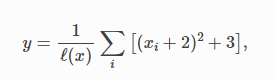

In [19]:
#Computation graph
a=x+2
b=a**2
c=b+3
y=c.mean()
print("Y",y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


### Computation Graph
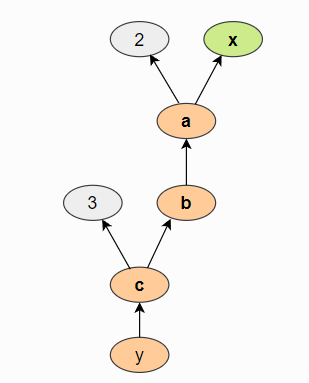

In [20]:
y.backward()
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


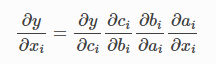

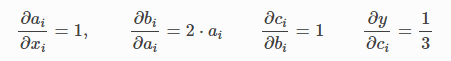

In [21]:
import torch.nn as nn
import torch.nn.functional as F

In [22]:
#Neural Network module
class SimpleClassifier(nn.Module):
    def __init__(self,n_inputs,n_hidden,n_outputs):
        super().__init__()
        #Initiliaze the layers of the network
        self.linear1=nn.Linear(n_inputs,n_hidden)
        self.act_fn=nn.Tanh()
        self.linear2=nn.Linear(n_hidden,n_outputs)

    def forward(self,x):
        #Network Feedforward,backcalculations and gradients are calculated here
        x=self.linear1(x)
        x=self.act_fn(x)
        x=self.linear2(x)
        return x

In [23]:
#model compile
model=SimpleClassifier(n_inputs=2,n_hidden=4,n_outputs=1)
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [24]:
#Get the details of weights and bias matrices
for name,param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


In [25]:
import torch.utils.data as data

In [26]:
class XORDataset(data.Dataset):

    def __init__(self,size,std=0.1):
        """

        Inputs:
            size - Number of datapoints we want to generate
            std - Standard deviation of the noise
            """
        
        super().__init__()
        self.size=size
        self.std=std
        self.generate_continous_xor()

    def generate_continous_xor(self):
        #Each data point in XOR dataset has two variables, x and y, that can be either 1 or 0
        #The label is their XOR combination i.e 1 if only x or y is 1 while the other is 0.
        #If x=y, the label is 0.
        data=torch.randint(low=0, high=2, size=(self.size,2),dtype=torch.float32)
        label=(data.sum(dim=1)==1).to(torch.long)

        data+=self.std*torch.randn(data.shape)

        self.data=data
        self.label=label

    def __len__(self):
        # Number of data point we have.
        return self.size
    
    def __getitem__(self,idx):
        data_point=self.data[idx]
        data_label=self.label[idx]
        return data_point,data_label


In [27]:
dataset=XORDataset(size=200)
print("Size of the dataset:",len(dataset))
print("Data point 0:",dataset[0])

Size of the dataset: 200
Data point 0: (tensor([0.1470, 0.8878]), tensor(1))


In [28]:
import os
import math
import numpy as np
import time
## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

C:\Users\BHELDNA\AppData\Local\Temp\ipykernel_52520\2357863821.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [29]:
def visualize_samples(data,label):
    if isinstance(data,torch.Tensor):
        data=data.cpu().numpy()
    if isinstance(label,torch.Tensor):
        label=label.cpu().numpy()

    data_0=data[label==0]
    data_1=data[label==1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0],data_0[:,1],edgecolors="#333",label="Class 0")
    plt.scatter(data_1[:,0],data_1[:,1],edgecolors="#333",label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

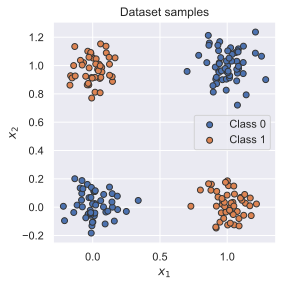

In [30]:
visualize_samples(dataset.data,dataset.label)
plt.show()

In [31]:
#create a Dataloader
data_loader=data.DataLoader(dataset,batch_size=8,shuffle=True)

In [32]:
#next(iter(...)) catches the first batch of the dataloader
#If Shuffle is True, this will return a different batch every time we run this cell
#For iterating over the whole dataset we can simply use "for batch in data_loader:"
data_inputs,data_labels=next(iter(data_loader))

#The shape of he outputs are [batch_size,d_1,.....,d_N] where d_1,.....d_N are the 
#dimensions of the data point returned from the dataset class
print("Data inputs",data_inputs.shape,"\n",data_inputs)
print("Data labels",data_labels.shape,"\n",data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[ 1.2173e+00,  2.2524e-02],
        [ 1.0626e+00,  1.0914e+00],
        [-2.7863e-02,  1.0589e+00],
        [ 9.9912e-01,  8.5048e-02],
        [-1.0164e-03,  2.3372e-02],
        [-5.1567e-02, -7.5318e-02],
        [ 8.6139e-01,  1.6513e-01],
        [ 1.1713e+00,  6.4644e-02]])
Data labels torch.Size([8]) 
 tensor([1, 0, 1, 1, 0, 0, 1, 1])


In [33]:
loss_module=nn.BCEWithLogitsLoss()

In [34]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)

In [35]:
train_dataset=XORDataset(size=2500)
train_data_loader=data.DataLoader(train_dataset,batch_size=128,shuffle=True)

In [36]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cpu


In [37]:
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [38]:
def train_model(model,optimizer,data_loader,loss_module,num_epochs=100):
    #set the model to train mode
    model.train()

    #training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs,data_labels in data_loader:

            #Step 1 : Move data to device
            data_inputs=data_inputs.to(device)
            data_labels=data_labels.to(device)

            #Step 2: Run the model on the input data
            preds=model(data_inputs)
            preds=preds.squeeze(dim=1) #Output is [Batch_size,1], but we want [Batch size]

            ##Step 3: Calculate loss
            loss=loss_module(preds,data_labels.float())

            #Step 4: Perform Backpropagation
            #Before calculating gradients we need to ensure that they are all zero.
            #the gradients will not be overwritten,  but actually added to the existing ones
            optimizer.zero_grad()
            #Perform backpropagation
            loss.backward()

            #Step 5: Update the parameters
            optimizer.step()



In [40]:
train_model(model,optimizer,train_data_loader,loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

### Saving the model

In [41]:
state_dict=model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-1.9044, -1.7283],
        [-0.3629, -0.7245],
        [ 2.8766, -3.3909],
        [ 3.6952, -3.3269]])), ('linear1.bias', tensor([ 0.3231,  1.0125, -1.3243,  1.6021])), ('linear2.weight', tensor([[-2.6238,  1.6251,  5.0574, -5.3799]])), ('linear2.bias', tensor([2.4159]))])


In [42]:
#Save the model with torch.save(object,filename). any extension can be used for filename
torch.save(state_dict,"our_model.tar")

In [43]:
#Load a model
state_dict=torch.load("our_model.tar")

#Create a new model and load the state
new_model=SimpleClassifier(n_inputs=2,n_hidden=4,n_outputs=1)
new_model.load_state_dict(state_dict)

#Verify that the parameters are the same
print("Original model\n",model.state_dict())
print("\nOriginal model\n",new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[-1.9044, -1.7283],
        [-0.3629, -0.7245],
        [ 2.8766, -3.3909],
        [ 3.6952, -3.3269]])), ('linear1.bias', tensor([ 0.3231,  1.0125, -1.3243,  1.6021])), ('linear2.weight', tensor([[-2.6238,  1.6251,  5.0574, -5.3799]])), ('linear2.bias', tensor([2.4159]))])

Original model
 OrderedDict([('linear1.weight', tensor([[-1.9044, -1.7283],
        [-0.3629, -0.7245],
        [ 2.8766, -3.3909],
        [ 3.6952, -3.3269]])), ('linear1.bias', tensor([ 0.3231,  1.0125, -1.3243,  1.6021])), ('linear2.weight', tensor([[-2.6238,  1.6251,  5.0574, -5.3799]])), ('linear2.bias', tensor([2.4159]))])


State_Dict for model weights and biases

In [45]:
#Now create a Test set from our XORDataset generator
test_dataset=XORDataset(size=500)
#drop last - > we need drop the last batch even if it is smaller than the batch size
test_data_loader=data.DataLoader(test_dataset,batch_size=128,shuffle=False,drop_last=False)

### Evaluation
- During the evaluation phase we dont need to track the computation graph as we dont intend to calculate the gradients. This saves memory. In Pytorch we can deactivate computation graph

In [46]:
def eval_model(model,data_loader):
    model.eval() # Set model to eval mode
    true_preds,num_preds=0.,0.

    with torch.no_grad(): #Deactivate gradients for the following code
        for data_inputs,data_labels in data_loader:

            #Determine prediction of model on test set
            data_inputs,data_labels=data_inputs.to(device),data_labels.to(device)
            preds=model(data_inputs)
            preds=preds.squeeze(dim=1)
            preds=torch.sigmoid(preds) #Sigmoid to map predictions between 0 and 1
            pred_labels=(preds>=0.5).long() #Binarize the predictions to 0 and 1

            #Keep records of predictions for the accuracy metric (true_predsTP+TN,num_preds=TP+TN+FP+FN)
            true_preds+=(pred_labels==data_labels).sum()
            num_preds+=data_labels.shape[0]

    acc=true_preds/num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [47]:
eval_model(model,test_data_loader)

Accuracy of the model: 99.80%


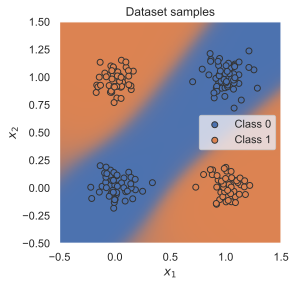

In [48]:
@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()